# Customer Churn Prediction: PDP, ICE, and ALE Explanations

## Dataset Overview
This notebook uses the **Customer Churn Dataset** from Kaggle to predict customer churn. The dataset contains features such as `MonthlyCharges`, `Tenure`, and `TotalCharges`, which are used to predict the likelihood of a customer leaving the service. The target variable is `Churn`, which indicates whether a customer has churned.

## Model Explanation
We chose a **RandomForestClassifier** due to its flexibility and strong performance on classification tasks. The model can handle both numerical and categorical data, making it a suitable choice for this dataset.


# Install Required Libraries

In [1]:
# Install ALEPython from the development branch
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython
!pip install numpy==1.25.2 pandas==2.0.3 scikit-learn==1.2.2 shap==0.45.1


  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-eib2ec5l/alepython_cfad84b3912e42daba5c2dc9520f757e
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-eib2ec5l/alepython_cfad84b3912e42daba5c2dc9520f757e
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done


# Import Libraries and Load Data







In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.inspection import PartialDependenceDisplay
import shap
from alepython import ale_plot

# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)

# Create a DataFrame
df = data.frame

# Preview the dataset
df.head()

# Set features and target
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']]
y = df['MedHouseVal']  # Target: Median house value


# Exploratory Data Analysis (EDA) and Correlation Analysis

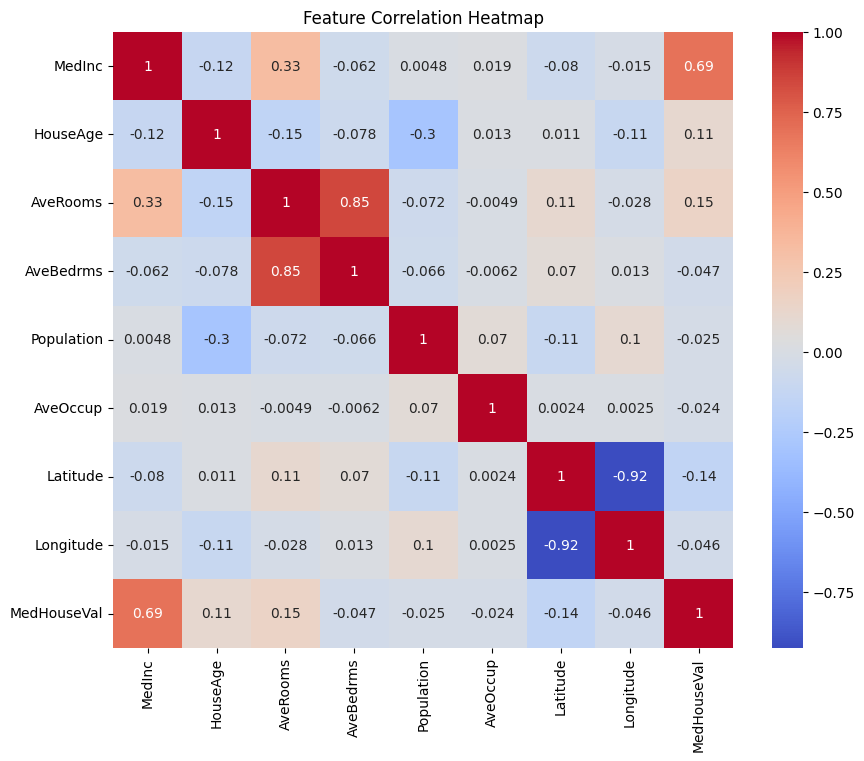

In [3]:
# Check for correlations
correlation_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# Train the Model

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# PDP and ICE Plots

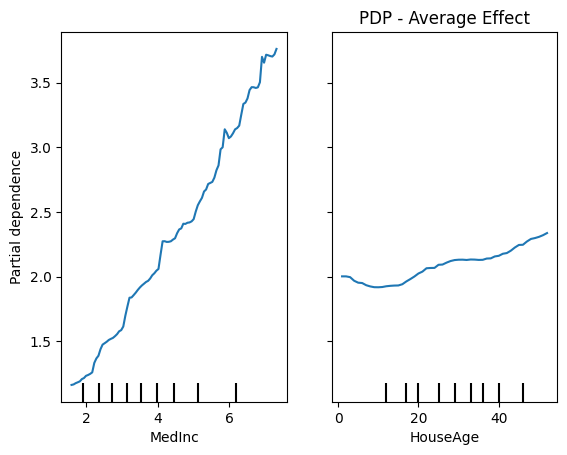

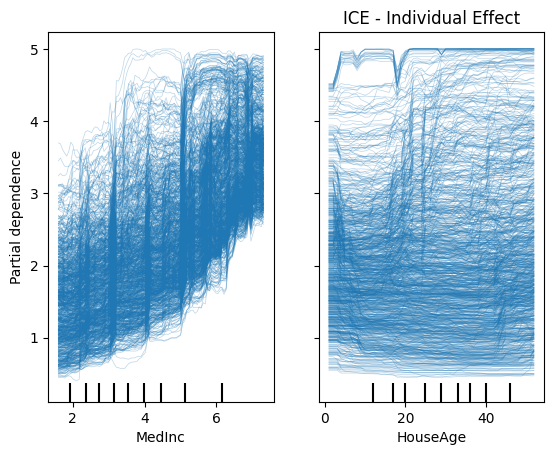

In [5]:
# Generate Partial Dependence Plots (PDP)
PartialDependenceDisplay.from_estimator(model, X_train, [0, 1], kind='average')
plt.title("PDP - Average Effect")
plt.show()

# Generate ICE plots
PartialDependenceDisplay.from_estimator(model, X_train, [0, 1], kind='individual')
plt.title("ICE - Individual Effect")
plt.show()


### Explanation:
- **PDP**: The PDP shows the average effect of each feature (e.g., MonthlyCharges and TotalCharges) on the probability of churn.
- **ICE**: The ICE plot shows how individual instances (customers) react differently to changes in these features, revealing more granular information compared to PDP.


# Generate SHAP Values

In [ ]:
# Create a SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary for feature importance
shap.summary_plot(shap_values, X_test)


KeyboardInterrupt: 

# ALE Plot

### Generate 1D ALE Plot

In [ ]:
# 1D ALE plot with monte carlo and hyperparameters
fig = ale_plot(
    model,
    X_train,
    'HouseAge',
    bins=10,
    monte_carlo=True,
    monte_carlo_rep=30,
    monte_carlo_ratio=0.5
)



### Generate 2D ALE Plot

In [ ]:
# 2D ALE plot to show interaction between 'MedInc' and 'HouseAge'
fig = ale_plot(
    model,
    X_train,
    ['MedInc', 'HouseAge'],
    bins=10
)



### Explanation:
The ALE plot accounts for interactions between features, providing a more localized view of how changes in features affect predictions. This method avoids the assumption of independence between features, unlike PDP.
